# Chapter 10 - Introduction to Artificial Neural Network with Keras

## Exercises
3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?
- Jawaban: Logistic Regression lebih baik karena dapat memberikan probabilitas output dan memiliki fungsi loss yang lebih baik. Perceptron bisa disetarakan dengan mengganti fungsi aktivasi threshold menjadi sigmoid.

4. Why was the logistic activation function a key ingredient in training the first MLPs?
- Jawaban: Fungsi aktivasi logistic (sigmoid) memungkinkan gradient descent bekerja dengan baik karena memiliki turunan yang kontinu dan tidak hilang.

5. Name three popular activation functions.
- Jawaban: Sigmoid, ReLU, dan tanh.

8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?
- Jawaban: Backpropagation adalah algoritma untuk menghitung gradient error terhadap weight. Reverse-mode autodiff adalah teknik komputasi yang digunakan untuk menghitung gradient secara efisien.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?
- Jawaban: Hyperparameter: jumlah layer, jumlah neuron, learning rate, batch size, optimizer. Untuk mengatasi overfitting: kurangi jumlah neuron/layer, tambah dropout, gunakan regularisasi, atau tambah data training.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [31]:
import numpy as np

In [2]:
tf.__version__

'2.19.0'

In [4]:
keras.__version__

'3.10.0'

## Image Classifier

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [17]:
model.get_layer("dense_3") is hidden1

True

In [19]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.03447992, -0.03058409,  0.05567676, ..., -0.01933407,
        -0.04366467, -0.06464516],
       [ 0.03242586,  0.00728625,  0.01346612, ...,  0.00043144,
        -0.06229217, -0.04797082],
       [-0.06102632, -0.03700448, -0.01667387, ...,  0.06511094,
         0.02914628,  0.06384182],
       ...,
       [-0.00812731,  0.06884667,  0.0680721 , ..., -0.01620717,
         0.04365678,  0.04372697],
       [ 0.05012686, -0.04042879,  0.0591265 , ..., -0.02198538,
        -0.06458374, -0.0154091 ],
       [ 0.07400343, -0.03165082,  0.00838447, ...,  0.04318257,
         0.0478201 ,  0.04678109]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [24]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.6823 - loss: 0.9809 - val_accuracy: 0.8244 - val_loss: 0.5236
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.8245 - loss: 0.5076 - val_accuracy: 0.8412 - val_loss: 0.4506
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.8419 - loss: 0.4527 - val_accuracy: 0.8392 - val_loss: 0.4556
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.8527 - loss: 0.4203 - val_accuracy: 0.8576 - val_loss: 0.4078
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8598 - loss: 0.3955 - val_accuracy: 0.8662 - val_loss: 0.3815
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.8671 - loss: 0.3733 - val_accuracy: 0.8676 - val_loss: 0.3770
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8715 - loss: 0.3640 - val_accuracy: 0.8642 - val_loss: 0.3859
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8737 -

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

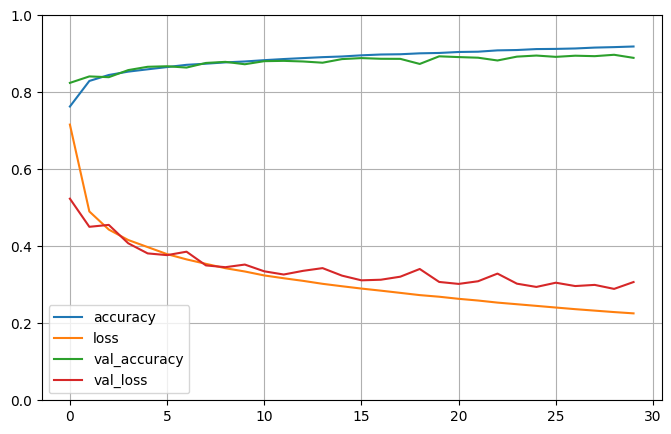

In [26]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.8371 - loss: 69.7211


[72.18934631347656, 0.8349999785423279]

In [28]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([9, 2, 1])

In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Regression MLP

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
housing = fetch_california_housing()

In [37]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]

Epoch 1/20
 96/363 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 2.5817

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 1.4454 - val_loss: 0.6206
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.5356 - val_loss: 0.6212
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.5037 - val_loss: 1.0789
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.4414 - val_loss: 1.4267
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.5132 - val_loss: 0.6219
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 0.4260 - val_loss: 0.4468
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.3899 - val_loss: 0.4127
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.3932 - val_loss: 0.4051
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.3891 - val_loss: 0.3963
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.3855 - val_loss: 0.3972
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.3718 - val_loss: 0.3865
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

In [40]:
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [41]:
print("Predictions:", y_pred)
print("Actual values:", y_test[:3])


Predictions: [[2.5642157]
 [2.0266838]
 [2.3836546]]
Actual values: [1.342 1.849 1.852]


## Complex Models 

In [42]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [43]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [44]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [45]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [46]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 4.1986 - val_loss: 1.3083
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 0.9111 - val_loss: 0.7614
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.6805 - val_loss: 0.6899
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.6229 - val_loss: 0.6458
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.6023 - val_loss: 0.6227
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - loss: 0.5780 - val_loss: 0.6054
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.5339 - val_loss: 0.5859
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 0.5471 - val_loss: 0.5737
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.5408 - val_loss: 0.5631
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.5147 - val_loss: 0.5458
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.5023 - val_loss: 0.5370
Epoch 12/20
363/363 ━━━━━━━━━━

In [47]:
print("Predictions:", y_pred)
print("Actual values:", y_test[:3])


Predictions: [[2.2769103]
 [2.059579 ]
 [2.3760686]]
Actual values: [1.342 1.849 1.852]


## Dynamic Models

In [48]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

## TensorBoard Visualization

In [49]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [50]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [51]:
run_logdir = get_run_logdir()

In [53]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
tensorboard_cb = keras.callbacks.TensorBoard(get_run_logdir())
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 3.0862 - val_loss: 0.8112
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.7119 - val_loss: 0.7216
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.6343 - val_loss: 0.6709
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.5989 - val_loss: 0.6378
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.5711 - val_loss: 0.6111
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.5474 - val_loss: 0.5885
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.5264 - val_loss: 0.5685
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.5080 - val_loss: 0.5510
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - loss: 0.4924 - val_loss: 0.5355
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.4789 - val_loss: 0.5220
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.4672 - val_loss: 0.5100
Epoch 12/30
363/363 ━━━━━━━━━━

## Fine Tuning Hyperparameter

In [57]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

In [64]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
203/363 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 3.2321

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 2.5263 - val_loss: 4.4221
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 0.7650 - val_loss: 1.2774
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - loss: 0.5579 - val_loss: 0.5821
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.4896 - val_loss: 0.5282
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.4694 - val_loss: 0.5118
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 0.4560 - val_loss: 0.4973
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.4446 - val_loss: 0.4851
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 0.4348 - val_loss: 0.4741
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.4265 - val_loss: 0.4644
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.4189 - val_loss: 0.4558
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.4122 - val_loss: 0.4477
Epoch 12/100
363/363 ━━━━━━━━━━

,model,<function bui...001D629E42840>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,None
,validation_batch_size,None
,verbose,1
,callbacks,None


In [65]:
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [69]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(1, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(
    KerasRegressor(build_model), 
    param_distribs,
    n_iter=10,
    cv=3
)

rnd_search_cv.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

Epoch 1/100
 95/242 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 1.5970 

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0843 - val_loss: 4.5913
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.4870 - val_loss: 0.4324
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.3999 - val_loss: 0.4052
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.3768 - val_loss: 0.3922
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.3624 - val_loss: 0.3824
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.3512 - val_loss: 0.3756
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.3429 - val_loss: 0.3687
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.3368 - val_loss: 0.3645
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 0.3313 - val_loss: 0.3555
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.3258 - val_loss: 0.3534
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.3201 - val_loss: 0.3474
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1245 - val_loss: 0.7897
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 0.4446 - val_loss: 0.4232
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.3880 - val_loss: 0.3942
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.3641 - val_loss: 0.3762
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: 0.3486 - val_loss: 0.3692
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.3371 - val_loss: 0.3675
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.3294 - val_loss: 0.3619
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.3233 - val_loss: 0.3628
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.3184 - val_loss: 0.3549
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.3130 - val_loss: 0.3545
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.3090 - val_loss: 0.3504
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8306 - val_loss: 0.4425
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.4519 - val_loss: 0.8412
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: nan - val_loss: nan
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: nan - val_loss: nan
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - loss: nan - val_loss: nan
Epo

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 492, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\scikeras\wrappers.py", line 1127, in score
    return self.score

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4836 - val_loss: 2.3404
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1.8860 - val_loss: 1.2857
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 1.0845 - val_loss: 0.9355
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.8202 - val_loss: 0.8089
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.7247 - val_loss: 0.7555
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.6834 - val_loss: 0.7273
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.6604 - val_loss: 0.7085
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.6441 - val_loss: 0.6938
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.6308 - val_loss: 0.6814
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.6192 - val_loss: 0.6704
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.6089 - val_loss: 0.6607
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2476 - val_loss: 2.9890
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 2.1075 - val_loss: 1.4777
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 1.0938 - val_loss: 0.9381
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.7591 - val_loss: 0.7367
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.6445 - val_loss: 0.6602
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.6020 - val_loss: 0.6337
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.5836 - val_loss: 0.6292
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.5734 - val_loss: 0.6352
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.5664 - val_loss: 0.6464
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.5607 - val_loss: 0.6601
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 0.5558 - val_loss: 0.6746
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7328 - val_loss: 2.8907
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 2.3101 - val_loss: 1.5124
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 1.2653 - val_loss: 1.0598
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.9266 - val_loss: 0.8953
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.8049 - val_loss: 0.8241
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.7519 - val_loss: 0.7850
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.7217 - val_loss: 0.7581
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.6999 - val_loss: 0.7368
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.6820 - val_loss: 0.7187
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.6664 - val_loss: 0.7028
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.6525 - val_loss: 0.6886
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9604 - val_loss: 4.8235
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 3.7468 - val_loss: 3.6356
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 2.8895 - val_loss: 2.8083
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 2.2766 - val_loss: 2.2251
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 1.8345 - val_loss: 1.8098
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 1.5136 - val_loss: 1.5114
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 1.2794 - val_loss: 1.2952
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 1.1078 - val_loss: 1.1375
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.9815 - val_loss: 1.0217
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.8881 - val_loss: 0.9360
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.8189 - val_loss: 0.8721
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5495 - val_loss: 7.0271
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 4.8476 - val_loss: 5.5975
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 3.6468 - val_loss: 4.5632
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 2.7932 - val_loss: 3.8062
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 2.1828 - val_loss: 3.2459
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 1.7437 - val_loss: 2.8263
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 1.4265 - val_loss: 2.5085
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.1963 - val_loss: 2.2647
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 1.0286 - val_loss: 2.0754
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 0.9060 - val_loss: 1.9263
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.8161 - val_loss: 1.8073
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3423 - val_loss: 5.3334
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 4.7460 - val_loss: 4.0813
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 3.6351 - val_loss: 3.1954
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 2.8470 - val_loss: 2.5577
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 2.2790 - val_loss: 2.0921
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.8646 - val_loss: 1.7483
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 1.5591 - val_loss: 1.4919
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 1.3319 - val_loss: 1.2992
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 1.1618 - val_loss: 1.1532
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 1.0334 - val_loss: 1.0418
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.9360 - val_loss: 0.9563
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4269 - val_loss: 1.5497
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.7078 - val_loss: 0.7495
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.6212 - val_loss: 0.6312
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 0.5598 - val_loss: 0.5852
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 0.5226 - val_loss: 0.5535
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.4928 - val_loss: 0.5266
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.4689 - val_loss: 0.5044
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.4497 - val_loss: 0.4852
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.4337 - val_loss: 0.4690
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.4205 - val_loss: 0.4558
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 0.4098 - val_loss: 0.4448
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8617 - val_loss: 2.0155
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.7637 - val_loss: 0.9700
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.6599 - val_loss: 0.7171
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.6069 - val_loss: 0.6217
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 0.5663 - val_loss: 0.5803
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 0.5330 - val_loss: 0.5582
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.5057 - val_loss: 0.5427
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.4832 - val_loss: 0.5298
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.4649 - val_loss: 0.5148
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.4499 - val_loss: 0.4987
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.4371 - val_loss: 0.4831
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1390 - val_loss: 1.1728
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.8402 - val_loss: 0.8364
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.6617 - val_loss: 0.6218
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.5807 - val_loss: 0.5892
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 0.5443 - val_loss: 0.5518
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 0.5129 - val_loss: 0.5269
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.4884 - val_loss: 0.5053
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.4684 - val_loss: 0.4882
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.4524 - val_loss: 0.4737
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.4391 - val_loss: 0.4607
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.4277 - val_loss: 0.4497
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2583 - val_loss: 2.5377
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 2.0570 - val_loss: 1.5422
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 1.3112 - val_loss: 1.1310
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1.0246 - val_loss: 0.9424
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 0.8802 - val_loss: 0.8488
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.7971 - val_loss: 0.7981
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.7465 - val_loss: 0.7679
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.7145 - val_loss: 0.7479
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.6927 - val_loss: 0.7331
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.6768 - val_loss: 0.7212
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.6640 - val_loss: 0.7109
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2812 - val_loss: 3.4254
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 2.0614 - val_loss: 3.2873
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 1.3456 - val_loss: 2.9728
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 1.0576 - val_loss: 2.5038
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 0.9018 - val_loss: 2.0676
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.8100 - val_loss: 1.7201
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.7543 - val_loss: 1.4542
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.7192 - val_loss: 1.2508
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.6953 - val_loss: 1.0934
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.6775 - val_loss: 0.9721
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.6633 - val_loss: 0.8794
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4675 - val_loss: 3.0580
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 2.0616 - val_loss: 1.8923
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2423 - val_loss: 1.2176
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9123 - val_loss: 0.9185
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.7819 - val_loss: 0.7965
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.7253 - val_loss: 0.7476
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.6961 - val_loss: 0.7237
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.6768 - val_loss: 0.7078
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.6615 - val_loss: 0.6945
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6482 - val_loss: 0.6824
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.6361 - val_loss: 0.6710
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8591 - val_loss: 0.6289
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.5168 - val_loss: 0.6091
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - loss: 0.4375 - val_loss: 0.4933
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.4067 - val_loss: 0.4815
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.3900 - val_loss: 0.4106
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.3773 - val_loss: 0.4115
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 0.3702 - val_loss: 0.3908
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.3635 - val_loss: 0.3914
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.3587 - val_loss: 0.3819
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.3544 - val_loss: 0.3809
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.3509 - val_loss: 0.3758
Epoch 12/100
242/242 ━━━━━━━━━━━━

c:\Users\USER\Documents\SchoolWork\College\8th\ML\ml-enrichment-repo-ray\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4332 - val_loss: 0.6876
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.5575 - val_loss: 0.5143
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.4626 - val_loss: 0.4541
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.4196 - val_loss: 0.4331
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.3975 - val_loss: 0.4268
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 0.3834 - val_loss: 0.4232
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.3743 - val_loss: 0.4182
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.3676 - val_loss: 0.4127
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.3620 - val_loss: 0.4073
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.3573 - val_loss: 0.4022
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.3532 - val_loss: 0.3988
Epoch 12/100
242/242 ━━━━━━━━━━━━

KeyboardInterrupt: 

In [70]:
rnd_search_cv.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model